# 2016 Election Simulator using Markov Chains

## Introduction to a simple simulation.

Today we will relive the 2016 elections using Markov chains. An introduction to Markov chains can be found [here](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d) while an example using code can be found [here](https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial). Simulating the 2016 election is important in light of the criticisms of the [2016 election forecasts](https://www.currentaffairs.org/2016/12/why-you-should-never-ever-listen-to-nate-silver). Let's start by running 2016 100 times and see who gets elected based on the [538 chances at the time](https://projects.fivethirtyeight.com/2016-election-forecast/).

In [1]:
#Import numpy for arrays and random to simulate probability. I later added matplotlib for plotting.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def twenty_sixteen_election(times):
    #This function uses numpy's random choice to pick a winner based on the probability I've fed in.
    result = ['Clinton Wins', 'Trump Wins']
    p = [.714, .286]
    ClintonWins = 0
    TrumpWins = 0
    for x in range(times):
        election = np.random.choice(result, replace=True, p=p)
        if election == 'Clinton Wins':
            ClintonWins += 1
        else:
            TrumpWins += 1
    print("In our simulation Clinton won", ClintonWins, "times.")
    print("In our simulation Trump won", TrumpWins, "times.")

In [10]:
twenty_sixteen_election(100)

In our simulation Clinton won 69 times.
In our simulation Trump won 31 times.


As you can see Clinton won the majority of the time but Trump won 31 times. The main takeaway here is that 28% is not zero. I'll leave [others](https://www.quantamagazine.org/why-nate-silver-sam-wang-and-everyone-else-were-wrong-20161109/) to debate 538's particular models or whether they were the correct numbers. Now onto the real fun.

## Now to make it a Markov election

Now in the example above the chances for a candidate to win remained the same throughout. This assumed that nothing would change from election to election. If this was happening in a multiverse with an infinite number of parallel universe, this might work. In this example we'll run our next simulation in a time linear fashion. Now after each candidate wins an election, they will have to face their same opponent with an incumbency factor. For this scenario Trump's incumbency factor will be that his [unpopularity as of 9/1/2018](https://projects.fivethirtyeight.com/trump-approval-ratings/) translates to Clinton's chances for victory. Clinton's incumbency factor will be a [poll run after the election](https://www.washingtonpost.com/news/the-fix/wp/2017/11/06/12-months-later-trump-would-probably-still-win-the-2016-election/?utm_term=.ab6161d96666) with Trump getting all of the undecided votes. Another side note is that the first current president is Obama so neither candidate will have an incumbency factor.

In [48]:
def simple_Markov_election(times):
    #We will start with the 2016 election
    Current_President = 'Obama'
    result = ['Clinton Wins', 'Trump Wins'] 
    p = [[.714, .286], [.46, .54], [.597, .403]]
    ClintonWins = 0
    TrumpWins = 0
    President_List = [Current_President]
    election = np.random.choice(result, replace=True, p=p[0])
    if election == 'Clinton Wins':
        ClintonWins += 1
        Current_President = 'Clinton'
        President_List.append('Clinton')
    else:
        TrumpWins += 1
        Current_President = 'Trump'
        President_List.append('Trump')
    print("The winner of the 2016 election is", Current_President + ".")
    #Now that the 2016 election is decided, we will run subsequent elections. I'll use range - 1 to account for the
    #first election
    for x in range(times - 1):
        if Current_President == 'Clinton':
            election = np.random.choice(result, replace=True, p=p[1])
            if election == 'Clinton Wins':
                ClintonWins += 1
                Current_President = 'Clinton'
                President_List.append('Clinton')
            else:
                TrumpWins += 1
                Current_President = 'Trump'
                President_List.append('Trump')
        else:
            election = np.random.choice(result, replace=True, p=p[2])
            if election == 'Clinton Wins':
                ClintonWins += 1
                Current_President = 'Clinton'
                President_List.append('Clinton')
            else:
                TrumpWins += 1
                Current_President = 'Trump'
                President_List.append('Trump')
    print("In our simulation Clinton won", ClintonWins, "times.")
    print("In our simulation Trump won", TrumpWins, "times.")

In [11]:
simple_Markov_election(100)

The winner of the 2016 election is Trump.
In our simulation Clinton won 51 times.
In our simulation Trump won 49 times.


This was an interesting result. Trump won the 2016 election in this multiverse(I admittedly ran this a few times while I made minor corrections to the code). However incumbency seems to have worked against him as Hillary won 51 times to Trump's 49. 

## Now let's add primaries to the mix

Now onto the main challenge. This time I'm going to add a primary level to the election simulation that mimics the democratic and republican primaries from 2016. In the democratic primary Hillary Clinton will face off against Bernie Sanders with the probability being the total of the popular vote each candidate got. The republican primary will start from the point when it contained Donald Trump, Ted Cruz, and John Kasich. I assigned the probability of each with the percentage of the popular vote each candidate got with the remaining portion going to Trump. As with the previous simulation, the current president is Obama so no one gets an incumbency factor.

### Incumbency

Given that there are more candidates, incumbency will work a little differently. An incumbent president follows two different rules from the other candidates:

* An incumbent president will have a 90% chance of beating primary challengers. This allows the Markov chain to go multiple levels.

* An incumbent's chances in the general will take a one standard deviation step of all probabilities in facing other challengers towards .7. For example, if Clinton's chances of winning against Trump, Cruz, and Kasich are 71%, 86%, and 93% respectively, as an incumbent they drop to 62%, 77%, and 84%(one standard deviation in this case being 9%). If this happened again the chances would be 71%, 68%, and 75%(assuming the same standard deviation).

I've also added an input to guess who the final president will be.

In [2]:
def original_election():
    #We will start with the 2016 election. The primary will create a senario number.
    Current_President = 'Obama'
    canidate = []
    President_List = [Current_President]
    canidate_sen = {'Clinton': {'Trump': 1, 'Cruz': 2, 'Kasich': 3},
                   'Sanders': {'Trump': 4, 'Cruz': 5, 'Kasich': 6}}
    ClintonWins = 0
    TrumpWins = 0
    SandersWins = 0
    CruzWins = 0
    KasichWins = 0
    result = ['Clinton Wins', 'Sanders Wins']
    p = [.552, .448]
    dem_primary = np.random.choice(result, replace=True, p=p)
    if dem_primary == 'Clinton Wins':
        canidate.append('Clinton')
    else:
        canidate.append('Sanders')
    result = ['Trump Wins', 'Cruz Wins', 'Kasich Wins']
    p = [.611, .251, .138]
    rep_primary = np.random.choice(result, replace=True, p=p)
    if rep_primary == 'Trump Wins':
        canidate.append('Trump')
    elif rep_primary == 'Cruz Wins':
        canidate.append('Cruz')
    else:
        canidate.append('Kasich')
    scenario_num = canidate_sen[canidate[0]][canidate[1]]
    #Now for the controversial part. I created 6 different senarios which can be picked out based on who wins.
    #I'm trying to be as historically accurate as possible but there is some guess work.
    #The senario number will determine which lists are used.
    result = ([['Clinton Wins', 'Trump Wins'], ['Clinton Wins', 'Cruz Wins'], ['Clinton Wins', 'Kasich Wins'], 
              ['Sanders Wins', 'Trump Wins'], ['Sanders Wins', 'Cruz Wins'], ['Sanders Wins', 'Kasich Wins']])
    p = [[.714, .286], [.857, .143], [.928, .072], [.55, .45], [.79, .21], [.895, .105]]
    election = np.random.choice(result[scenario_num - 1], replace=True, p=p[scenario_num - 1])
    if election == 'Clinton Wins':
        ClintonWins += 1
        Current_President = 'Clinton'
        President_List.append('Clinton')
    elif election == 'Trump Wins':
        TrumpWins += 1
        Current_President = 'Trump'
        President_List.append('Trump')
    elif election == 'Sanders Wins':
        SandersWins += 1
        Current_President = 'Sanders'
        President_List.append('Sanders')
    elif election == 'Cruz Wins':
        CruzWins += 1
        Current_President = 'Cruz'
        President_List.append('Cruz')
    else:
        KasichWins += 1
        Current_President = 'Kasich'
        President_List.append('Kasich')
    #Oh. It seems there are a lot of variables I want to pass on but I can only return so much.
    #I'll store all the values as a list which the next function will unpack
    compress = [Current_President, President_List, ClintonWins, TrumpWins, SandersWins, CruzWins, KasichWins]
    return compress

**Note**: For match ups against Clinton I took the Trump Clinton odds and then divided the republicans chances in half based on the idea that Trump was the strongest candidate on the republican side. I got the Sanders vs Trump numbers [here](https://www.cnn.com/2018/01/23/politics/2020-trump-biden-sanders-winfrey/index.html) and then applied the same halving logic.

In [5]:
def simulated_elections(times):
    #First we run a recursive 2016 election and unpack the original values
    print("Who do you think will be the president at the final iteration?")
    print("Please enter: Clinton, Sanders, Trump, Cruz, or Kasich")
    Pick = str(input())
    twenty_sixteen = original_election()
    Current_President = twenty_sixteen[0]
    President_List = twenty_sixteen[1]
    ClintonWins = twenty_sixteen[2]
    TrumpWins = twenty_sixteen[3]
    SandersWins = twenty_sixteen[4]
    CruzWins = twenty_sixteen[5]
    KasichWins = twenty_sixteen[6]
    print("The winner of the 2016 election is", Current_President + ".")
    #I'll make a senario for each president that contains a primary and an election
    for x in range(times - 1):
        if Current_President == 'Clinton':
            canidate = []
            canidate_sen = {'Clinton': {'Trump': 1, 'Cruz': 2, 'Kasich': 3},
                           'Sanders': {'Trump': 4, 'Cruz': 5, 'Kasich': 6}}
            result = ['Clinton Wins', 'Sanders Wins']
            p = [.9, .1]
            dem_primary = np.random.choice(result, replace=True, p=p)
            if dem_primary == 'Clinton Wins':
                canidate.append('Clinton')
            else:
                canidate.append('Sanders')
            result = ['Trump Wins', 'Cruz Wins', 'Kasich Wins']
            p = [.611, .251, .138]
            rep_primary = np.random.choice(result, replace=True, p=p)
            if rep_primary == 'Trump Wins':
                canidate.append('Trump')
            elif rep_primary == 'Cruz Wins':
                canidate.append('Cruz')
            else:
                canidate.append('Kasich')
            scenario_num = canidate_sen[canidate[0]][canidate[1]]
            result = ([['Clinton Wins', 'Trump Wins'], ['Clinton Wins', 'Cruz Wins'], ['Clinton Wins', 'Kasich Wins'],
                      ['Sanders Wins', 'Trump Wins'], ['Sanders Wins', 'Cruz Wins'], ['Sanders Wins', 'Kasich Wins']])
            p = [[.46, .54], [.768, .232], [.839, .161], [.55, .45], [.79, .21], [.895, .105]]
            election = np.random.choice(result[scenario_num - 1], replace=True, p=p[scenario_num - 1])
            if election == 'Clinton Wins':
                ClintonWins += 1
                Current_President = 'Clinton'
                President_List.append('Clinton')
            elif election == 'Trump Wins':
                TrumpWins += 1
                Current_President = 'Trump'
                President_List.append('Trump')
            elif election == 'Cruz Wins':
                CruzWins += 1
                Current_President = 'Cruz'
                President_List.append('Cruz')
            elif election == 'Sanders Wins':
                SandersWins += 1
                Current_President = 'Sanders'
                President_List.append('Sanders')
            else:
                KasichWins += 1
                Current_President = 'Kasich'
                President_List.append('Kasich')
        elif Current_President == 'Trump':
            canidate = []
            canidate_sen = {'Trump': {'Sanders': 1, 'Clinton': 2},
                           'Cruz': {'Sanders': 3, 'Clinton': 4},
                           'Kasich': {'Sanders': 5, 'Clinton': 6}}
            result = ['Trump Wins', 'Cruz Wins', 'Kasich Wins']
            p = [.9, .05, .05]
            rep_primary = np.random.choice(result, replace=True)
            if rep_primary == 'Trump Wins':
                canidate.append('Trump')
            elif rep_primary == 'Cruz Wins':
                canidate.append('Cruz')
            else:
                canidate.append('Kasich')
            result = ['Clinton Wins', 'Sanders Wins']
            p = [.552, .448]
            dem_primary = np.random.choice(result, replace=True, p=p)
            if dem_primary == 'Clinton Wins':
                canidate.append('Clinton')
            else:
                canidate.append('Sanders')
            scenario_num = canidate_sen[canidate[0]][canidate[1]]
            result = ([['Trump Wins', 'Sanders Wins'], ['Trump Wins', 'Clinton Wins'], ['Cruz Wins', 'Sanders Wins'], 
                      ['Cruz Wins', 'Clinton Wins'], ['Kasich Wins', 'Sanders Wins'], ['Kasich Wins', 'Clinton Wins']])
            p = [[.487, .513], [.54, .46], [.21, .79], [.143, .857], [.105, .895], [.072, .928]]
            election = np.random.choice(result[scenario_num - 1], replace=True, p=p[scenario_num - 1])
            if election == 'Trump Wins':
                TrumpWins += 1
                Current_President = 'Trump'
                President_List.append('Trump')
            elif election == 'Sanders Wins':
                SandersWins += 1
                Current_President = 'Sanders'
                President_List.append('Sanders')
            elif election == 'Cruz Wins':
                CruzWins += 1
                Current_President = 'Cruz'
                President_List.append('Cruz')
            elif election == 'Kasich Wins':
                KasichWins += 1
                Current_President = 'Kasich'
                President_List.append('Kasich')
            else:
                ClintonWins += 1
                Current_President = 'Clinton'
                President_List.append('Clinton')
        elif Current_President == 'Sanders':
            canidate = []
            canidate_sen = {'Sanders': {'Trump': 1, 'Cruz': 2, 'Kasich': 3}, 
                           'Clinton': {'Trump': 4, 'Cruz': 5, 'Kasich': 6}}
            result = ['Sanders Wins', 'Clinton Wins']
            p = [.9, .1]
            dem_primary = np.random.choice(result, replace=True, p=p)
            if dem_primary == 'Sanders Wins':
                canidate.append('Sanders')
            else:
                canidate.append('Clinton')
            result = ['Trump Wins', 'Cruz Wins', 'Kasich Wins']
            p = [.611, .251, .138]
            rep_primary = np.random.choice(result, replace=True, p=p)
            if rep_primary == 'Trump Wins':
                canidate.append('Trump')
            elif rep_primary == 'Cruz Wins':
                canidate.append('Cruz')
            else:
                canidate.append('Kasich')
            scenario_num = canidate_sen[canidate[0]][canidate[1]]
            result = ([['Sanders Wins', 'Trump Wins'], ['Sanders Wins', 'Cruz Wins'], ['Sanders Wins', 'Kasich Wins'], 
                      ['Clinton Wins', 'Trump Wins'], ['Clinton Wins', 'Cruz Wins'], ['Clinton Wins', 'Kasich Wins']])
            p = [[.694, .306], [.646, .354], [.751, .249], [.714, .286], [.857, .143], [.928, .072]]
            election = np.random.choice(result[scenario_num - 1], replace=True, p=p[scenario_num - 1])
            if election == 'Trump Wins':
                TrumpWins += 1
                Current_President = 'Trump'
                President_List.append('Trump')
            elif election == 'Sanders Wins':
                SandersWins += 1
                Current_President = 'Sanders'
                President_List.append('Sanders')
            elif election == 'Cruz Wins':
                CruzWins += 1
                Current_President = 'Cruz'
                President_List.append('Cruz')
            elif election == 'Clinton Wins':
                ClintonWins += 1
                Current_President = 'Clinton'
                President_List.append('Clinton')
            else:
                KasichWins += 1
                Current_President = 'Kasich'
                President_List.append('Kasich')
        elif Current_President == 'Cruz':
            canidate = []
            canidate_sen = {'Cruz': {'Sanders': 1, 'Clinton': 2},
                           'Trump': {'Sanders': 3, 'Clinton': 4},
                           'Kasich': {'Sanders': 5, 'Clinton': 6}}
            result = ['Cruz Wins', 'Trump Wins', 'Kasich Wins']
            p = [.9, .05, .05]
            rep_primary = np.random.choice(result, replace=True, p=p)
            if rep_primary == 'Cruz Wins':
                canidate.append('Cruz')
            elif rep_primary == 'Trump Wins':
                canidate.append('Trump')
            else:
                canidate.append('Kasich')
            result = ['Clinton Wins', 'Sanders Wins']
            p = [.552, .448]
            dem_primary = np.random.choice(result, replace=True, p=p)
            if dem_primary == 'Clinton Wins':
                canidate.append('Clinton')
            else:
                canidate.append('Sanders')
            scenario_num = canidate_sen[canidate[0]][canidate[1]]
            result = ([['Cruz Wins', 'Sanders Wins'], ['Cruz Wins', 'Clinton Wins'], ['Trump Wins', 'Sanders Wins'], 
                      ['Trump Wins', 'Clinton Wins'], ['Kasich Wins', 'Sanders Wins'], ['Kasich Wins', 'Clinton Wins']])
            p = [[.244, .756], [.177, .823], [.45, .55], [.714, .286], [.105, .895], [.072, .928]]
            election = np.random.choice(result[scenario_num - 1], replace=True, p=p[scenario_num - 1])
            if election == 'Cruz Wins':
                CruzWins += 1
                Current_President = 'Cruz'
                President_List.append('Cruz')
            elif election == 'Sanders Wins':
                SandersWins += 1
                Current_President = 'Sanders'
                President_List.append('Sanders')
            elif election == 'Trump Wins':
                TrumpWins += 1
                Current_President = 'Trump'
                President_List.append('Trump')
            elif election == 'Kasich Wins':
                KasichWins += 1
                Current_President = 'Kasich'
                President_List.append('Kasich')
            else:
                KasichWins += 1
                Current_President = 'Clinton'
                President_List.append('Clinton')
        else:
            canidate = []
            canidate_sen = {'Kasich': {'Sanders': 1, 'Clinton': 2},
                           'Trump': {'Sanders': 3, 'Clinton': 4},
                           'Cruz': {'Sanders': 5, 'Clinton': 6}}
            result = ['Kasich Wins', 'Trump Wins', 'Cruz Wins']
            p = [.9, .05, .05]
            rep_primary = np.random.choice(result, replace=True, p=p)
            if rep_primary == 'Kasich Wins':
                canidate.append('Kasich')
            elif rep_primary == 'Trump Wins':
                canidate.append('Trump')
            else:
                canidate.append('Cruz')
            result = ['Clinton Wins', 'Sanders Wins']
            p = [.552, .448]
            dem_primary = np.random.choice(result, replace=True, p=p)
            if dem_primary == 'Clinton Wins':
                canidate.append('Clinton')
            else:
                canidate.append('Sanders')
            scenario_num = canidate_sen[canidate[0]][canidate[1]]
            result = ([['Kasich Wins', 'Sanders Wins'], ['Kasich Wins', 'Clinton Wins'], ['Trump Wins', 'Sanders Wins'],
                      ['Trump Wins', 'Clinton Wins'], ['Cruz Wins', 'Sanders Wins'], ['Cruz Wins', 'Clinton Wins']])
            p = [[.107, .893], [.074, .926], [.45, .55], [.286, .714], [.21, .79], [.143, .857]]
            election = np.random.choice(result[scenario_num - 1], replace=True, p=p[scenario_num - 1])
            if election == 'Kasich Wins':
                KasichWins += 1
                Current_President = 'Kasich'
                President_List.append('Kasich')
            elif election == 'Sanders Wins':
                SandersWins += 1
                Current_President = 'Sanders'
                President_List.append('Sanders')
            elif election == 'Trump Wins':
                TrumpWins += 1
                Current_President = 'Trump'
                President_List.append('Trump')
            elif election == 'Cruz Wins':
                CruzWins += 1
                Current_President = 'Cruz'
                President_List.append('Cruz')
            else:
                ClintonWins += 1
                Current_President = 'Clinton'
                President_List.append('Clinton')
    print("In our simulation Clinton won", ClintonWins, "times.")
    print("In our simulation Trump won", TrumpWins, "times.")
    print("In our simulation Sanders won", SandersWins, "times.")
    print("In our simulation Cruz won", CruzWins, "times.")
    print("In our simulation Kasich won", KasichWins, "times.")
    if Pick == Current_President:
        print("Hey you got it right with", Pick + ".")
    else:
        print("Sorry.", Pick, "was not correct. It was", Current_President + ". Please try again.")
    ywins = [ClintonWins, TrumpWins, SandersWins, CruzWins, KasichWins]
    xwins = ['Clinton', 'Trump', 'Sanders', 'Cruz', 'Kasich']
    plt.figure(dpi=100)
    plt.bar(xwins, ywins, color='blue', edgecolor='black')
    plt.xlabel('Candidate name')
    plt.ylabel('Number of times candidate won')
    plt.title('Number of times each candidate won in the simulation')
    plt.show()
    plt.figure(dpi=100)
    plt.plot(President_List)
    plt.xlabel('Simulation Number')
    plt.ylabel('Current President')
    plt.title('Timeline of election winners')
    plt.show()

Who do you think will be the president at the final iteration?
Please enter: Clinton, Sanders, Trump, Cruz, or Kasich
Sanders
The winner of the 2016 election is Sanders.
In our simulation Clinton won 34 times.
In our simulation Trump won 23 times.
In our simulation Sanders won 38 times.
In our simulation Cruz won 4 times.
In our simulation Kasich won 1 times.
Hey you got it right with Sanders.


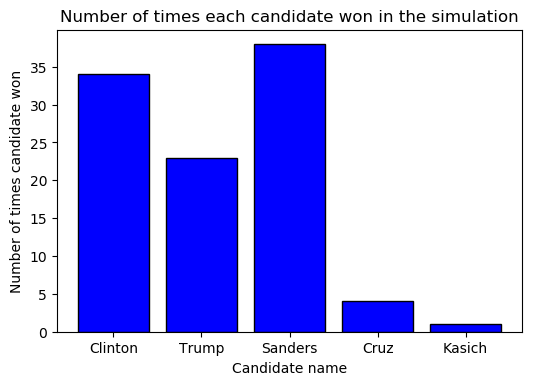

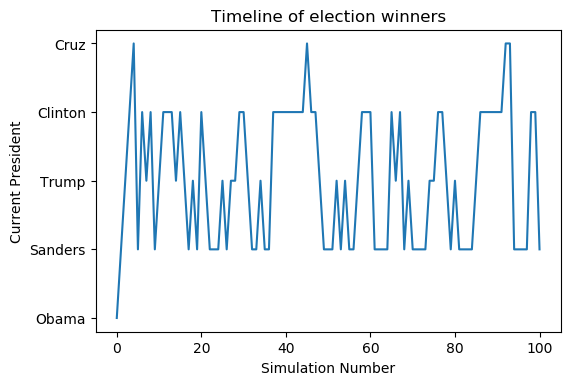

In [6]:
simulated_elections(100)

Each simulation will record and graph the number of times each candidate won the presidency. Generally Clinton, Trump, and Sanders tend to win the most elections every time I run the code. Please feel free to give this a try.